# CHAPTER 8 Plotting and Visualization

In [1]:
%pylab inline

from numpy.random import randn
import numpy as np

from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## 绘制地图：图形化显示海地地震危机数据

步骤提示：
1. 读取数据
2. 观察数据
3. 清理数据（移除缺失值、异常值）
4. 分类信息（编码、名称）
5. 绘制地图（根据事件地理范围）
6. 绘制数据（根据事件地理位置）

### 读取数据

In [2]:
data = pd.read_csv('ch08/Haiti.csv')
data.ix[0]

Serial                                                         4052
INCIDENT TITLE    * URGENT * Type O blood donations needed in #J...
INCIDENT DATE                                      05/07/2010 17:26
LOCATION                                              Jacmel, Haiti
DESCRIPTION       Birthing Clinic in Jacmel #Haiti urgently need...
CATEGORY                1. Urgences | Emergency, 3. Public Health, 
LATITUDE                                                    18.2333
LONGITUDE                                                  -72.5333
APPROVED                                                        YES
VERIFIED                                                         NO
Name: 0, dtype: object

### 观察数据

In [3]:
# 统计描述
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [4]:
# 事件类别
data['CATEGORY'].head(10)

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
8    2. Urgences logistiques | Vital Lines, 2f. San...
9    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [5]:
data['CATEGORY'].isnull().any()

True

### 清理数据

In [6]:
# 移除缺失值、异常值
data = data[(data['LATITUDE'] > 18) &
            (data['LATITUDE'] < 20) &
            (data['LONGITUDE'] > -75) &
            (data['LONGITUDE'] < -72) &
            (data['CATEGORY'].notnull())]

In [7]:
# 统计描述
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3536.000000,3536.000000,3536.000000
mean,2086.182975,18.592303,-72.430384
std,1167.491412,0.272913,0.286604
min,4.000000,18.065300,-74.452757
25%,1088.750000,18.524453,-72.418167
50%,2171.500000,18.539269,-72.335000
75%,3090.250000,18.561625,-72.294390
max,4052.000000,19.940630,-72.003891


### 分类信息

In [8]:
# 观察信息类别
event = data.ix[0].CATEGORY
event

'1. Urgences | Emergency, 3. Public Health, '

In [9]:
strings = (cat.strip() for cat in event.split(','))
cats = [x for x in strings if x]

for cat in cats:
    code, name = cat.split('.')
    if '|' in name:
        name = name.split('|')[1]
    print code, name.strip()

1 Emergency
3 Public Health


In [10]:
# 收集所有事件字串
def get_strings(catstr):
    strings = (cat.strip() for cat in catstr.split(','))
    return [x for x in strings if x]

strings = np.concatenate([get_strings(catstr) for catstr in data.CATEGORY])
len(strings)

7118

In [11]:
# 取出 code, name
def get_code_name(string):
    code, name = string.split('.')
    if '|' in name:
        name = name.split('|')[1]
    return code, name.strip()

cats = Series(dict(get_code_name(string) for string in strings))
len(cats)

45

In [12]:
cats.head()

1             Emergency
1a    Highly vulnerable
1b    Medical Emergency
1c       People trapped
1d                 Fire
dtype: object

In [13]:
cats

1                                  Emergency
1a                         Highly vulnerable
1b                         Medical Emergency
1c                            People trapped
1d                                      Fire
2                                Vital Lines
2a                             Food Shortage
2b                            Water shortage
2c                        Contaminated water
2d                            Shelter needed
2e                             Fuel shortage
2f                              Power Outage
3                              Public Health
3a                  Infectious human disease
3b                        Chronic care needs
3c        Medical equipment and supply needs
3d                      OBGYN/Women's Health
3e                          Psychiatric need
4                           Security Threats
4a                                   Looting
4c                            Group violence
4e    Water sanitation and hygiene promotion
5         

In [14]:
len(cats)

45

In [15]:
cats['1'], cats['3']

('Emergency', 'Public Health')

### 分类信息

In [16]:
# 信息编码
dummies = DataFrame(np.zeros((len(data), len(cats))), columns=cats.index)

In [17]:
for idx, cat in enumerate(data.CATEGORY):
    strings = [x.strip() for x in cat.split(',')]
    codes = [x.split('.')[0] for x in strings if x]
    dummies.ix[idx, codes] = 1

In [18]:
# 观察编码结果
dummies.sum(1).head()

0    2.0
1    1.0
2    1.0
3    2.0
4    1.0
dtype: float64

In [19]:
data = data.join(dummies.add_prefix('category_'))
data.ix[0]

Serial                                                         4052
INCIDENT TITLE    * URGENT * Type O blood donations needed in #J...
INCIDENT DATE                                      05/07/2010 17:26
LOCATION                                              Jacmel, Haiti
DESCRIPTION       Birthing Clinic in Jacmel #Haiti urgently need...
CATEGORY                1. Urgences | Emergency, 3. Public Health, 
LATITUDE                                                    18.2333
LONGITUDE                                                  -72.5333
APPROVED                                                        YES
VERIFIED                                                         NO
category_1                                                        1
category_1a                                                       0
category_1b                                                       0
category_1c                                                       0
category_1d                                     

In [20]:
data[data['category_1'] == 1]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,4033,Help needed in Brochette,17/03/2010 13:40,"Brochette 99, Brochette, west of Carrefour","We live in brochette 99, we don't find any hel...","2. Urgences logistiques | Vital Lines, 2b. Pen...",18.525190,-72.458954,YES,NO,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,4029,Food /water and medicals supplies/ petit-goave,26/04/2010 12:37,petit goave,[13709949] · we are suffering in the area &quo...,"1. Urgences | Emergency, 7. Secours | Services...",18.426199,-72.818756,YES,NO,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,4027,Medical attention needed on Delmas 41,26/04/2010 16:12,Delmas 41,I am mikaelle I need to know where the hospita...,"3. Public Health, 3b. Chronic care needs,",18.547300,-72.301000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,3959,Shelter needed in Leogane,23/03/2010 10:32,Place Bagadet,I would like to know if united state don't res...,"2. Urgences logistiques | Vital Lines, 2d. Ref...",18.495238,-72.658081,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,3947,Community Based Survey: Centre d’hebergement o...,31/03/2010 01:26,North of Carrefour Beudet and Route Lillavois,Statistics on the IDP Camp: \nPopulation: 902 ...,"5. Infrastructure Damage, 2. Urgences logistiq...",18.607190,-72.221500,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,3926,IDP camp of 409 families has received no assis...,28/03/2010 22:24,"Vilage de la Repatrie, Cite Soleil",An IDP camp of 409 families in Village de le R...,"2b. Penurie d'eau | Water shortage, 2f. Sans c...",18.603517,-72.336400,YES,YES,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,3924,IDP camp of 150 families has received no assis...,28/03/2010 22:09,"Martial, Cite Soleil",IDP camp of 150 families in Martial in Cite So...,"2b. Penurie d'eau | Water shortage, 2f. Sans c...",18.606983,-72.323650,YES,YES,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
116,3896,NEED BASIC SERVICES - Universite Lumiere,11/03/2010 11:20,Delmas 73,"Universite Lumiere a besoin d'aide. A date, no...","2b. Penurie d'eau | Water shortage, 2d. Refuge...",18.544722,-72.302778,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,3895,Shelter Needed in Leogane Area,10/03/2010 10:10,Leogane,"english: \t\n\nI am colby, i am living at Leog...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.518800,-72.599200,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 绘制地图（根据事件地理范围）

17.733333 18.733333 -73.033333 -72.033333


/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


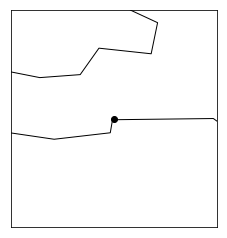

In [21]:
# 根据经纬度画出地图
lat, lon = data.ix[0,['LATITUDE', 'LONGITUDE']]

lllat, urlat = lat - .5, lat + .5
lllon, urlon = lon - .5, lon + .5

from mpl_toolkits.basemap import Basemap

#ax = plt.subplot(1,1,1)
m = Basemap(projection='stere',
            lon_0=lon,
            lat_0=lat,
            llcrnrlat=lllat,
            urcrnrlat=urlat,
            llcrnrlon=lllon,
            urcrnrlon=urlon,
            resolution='l')
m.drawcoastlines()
m.drawstates()
m.drawcountries()

x, y = m(data.ix[0,'LONGITUDE'], data.ix[0,'LATITUDE'])
m.plot(x, y, 'ko')

print lllat, urlat, lllon, urlon

### 绘制数据（根据事件地理位置）

In [22]:
def gen_map(ax=None, lllat=17, urlat=19, lllon=-74, urlon=-72):
    m = Basemap(ax=ax,
                projection='stere',
                lon_0=(lllon+urlon)/2,
                lat_0=(lllat+urlat)/2,
                llcrnrlat=lllat,
                urcrnrlat=urlat,
                llcrnrlon=lllon,
                urcrnrlon=urlon,
                resolution='l')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [23]:
lllat=np.floor(data.LATITUDE.min())-0.25
urlat=np.ceil(data.LATITUDE.max())+0.25
lllon=np.floor(data.LONGITUDE.min())-0.25
urlon=np.ceil(data.LONGITUDE.max())+0.25

print lllat, urlat, lllon, urlon

17.75 20.25 -75.25 -71.75


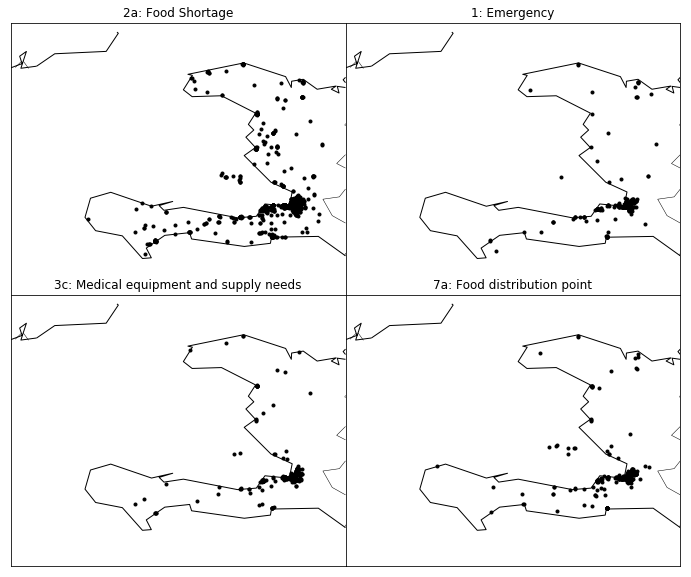

In [24]:
codes = ['2a', '1', '3c', '7a']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)

for code, ax in zip(codes, axes.flat):
    m = gen_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    m.plot(x, y, 'k.')
    ax.set_title('%s: %s' % (code, cats[code]))

### 反映食物短缺

In [25]:
food_shortage = data[data['category_2a'] == 1]

lllat=np.floor(food_shortage.LATITUDE.min())-0.25
urlat=np.ceil(food_shortage.LATITUDE.max())+0.25
lllon=np.floor(food_shortage.LONGITUDE.min())-0.25
urlon=np.ceil(food_shortage.LONGITUDE.max())+0.25

print lllat, urlat, lllon, urlon

17.75 20.25 -75.25 -71.75


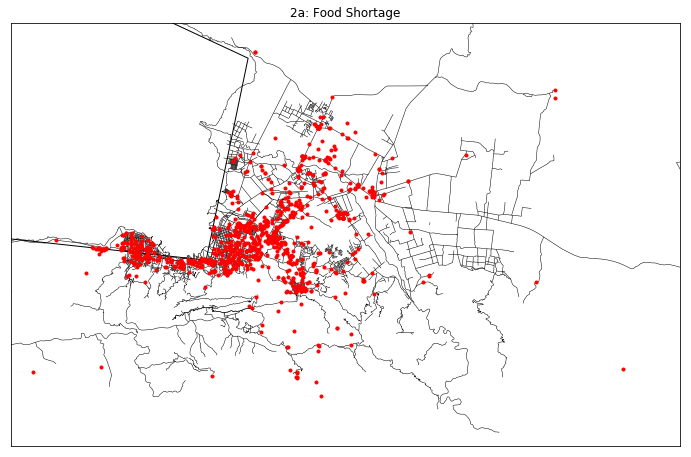

In [26]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)

lllat=18.4; urlat=18.7; lllon=-72.5; urlon=-72
m = Basemap(ax=ax,
            projection='stere',
            lon_0=(lllon+urlon)/2,
            lat_0=(lllat+urlat)/2,
            llcrnrlat=lllat,
            urcrnrlat=urlat,
            llcrnrlon=lllon,
            urcrnrlon=urlon,
            resolution='l')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.readshapefile(shapefile_path, 'roads')

x, y = m(food_shortage.LONGITUDE.values, food_shortage.LATITUDE.values)
m.plot(x, y, 'r.')

ax.set_title('%s: %s' % ('2a', cats['2a']))